# **JOBSHEET 11 - CONVOLUTIONAL NEURAL NETWORK (CNN)**

- Naresh Pratista
- 2141720057
- TI 3H

## **Langkah 1 - Import Library**

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## **Langkah 2 - Pra Pengolahan Data**

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### **Langkah 2.1. Pra Pengolahan Data Training**

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### **Langkah 2.2. Pra Pengolahan Data Testing**

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/training_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.


## **Langkah 3 - Pembuatan Model CNN**

### **Langkah 3.1.  - Inisiasi Model CNN**

In [5]:
cnn = tf.keras.models.Sequential()

### **Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### **Langkah 3.3 - Pembuatan Layer Pooling 1**

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### **Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### **Langkah 3.5 - Flattening**

In [9]:
cnn.add(tf.keras.layers.Flatten())

### **Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### **Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### **Langkah 3.8 - Compile Model CNN**

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

## **Langkah 4 - Fit CNN**

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 2629s 10s/step - loss: 0.6606 - accuracy: 0.6031 - val_loss: 0.6754 - val_accuracy: 0.6131
Epoch 2/25
250/250 [==============================] - 73s 294ms/step - loss: 0.5860 - accuracy: 0.6905 - val_loss: 0.5313 - val_accuracy: 0.7318
Epoch 3/25
250/250 [==============================] - 53s 213ms/step - loss: 0.5450 - accuracy: 0.7224 - val_loss: 0.6017 - val_accuracy: 0.6845
Epoch 4/25
250/250 [==============================] - 52s 210ms/step - loss: 0.5216 - accuracy: 0.7358 - val_loss: 0.4914 - val_accuracy: 0.7599
Epoch 5/25
250/250 [==============================] - 52s 210ms/step - loss: 0.4937 - accuracy: 0.7584 - val_loss: 0.4608 - val_accuracy: 0.7855
Epoch 6/25
250/250 [==============================] - 52s 209ms/step - loss: 0.4763 - accuracy: 0.7719 - val_loss: 0.4227 - val_accuracy: 0.8060
Epoch 7/25
250/250 [==============================] - 52s 209ms/step - loss: 0.4671 - accuracy: 0.7746 - val_loss: 0.4057 - val_ac

## **Langkah 5 - Prediksi dengan 1 Citra**
Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

In [14]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 196ms/step


# **Praktikum 2 - Klasifikasi Multi-label dengan Data CIFAT**

## **Langkah 1 - Load Library**

In [15]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## **Langkah 2 - Unduh Dataset CIFAR**

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 5s 0us/step


## **Langkah 3 - Verifikasi Data**

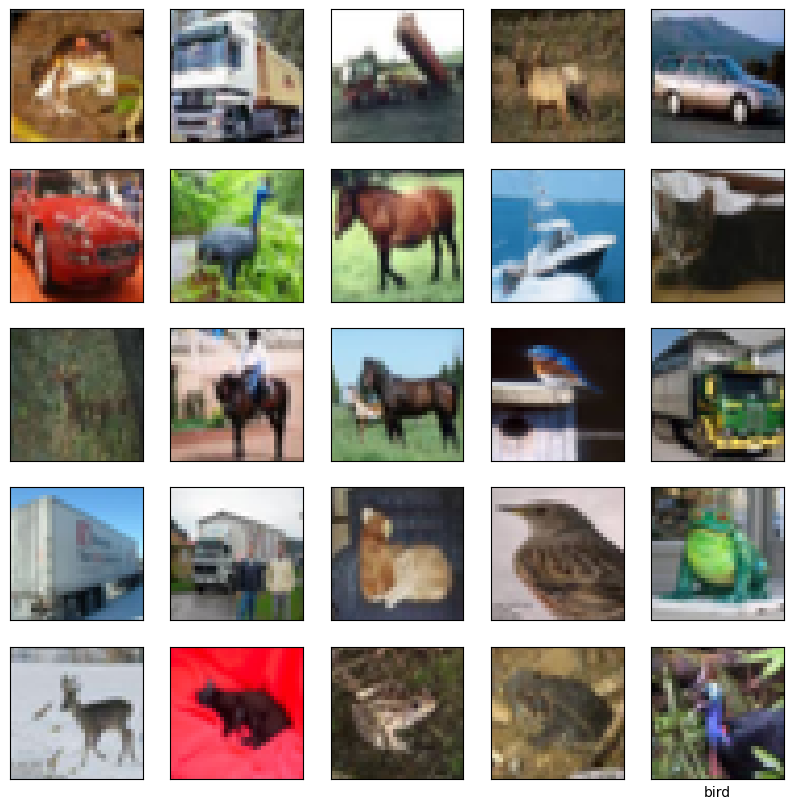

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
# The CIFAR labels happen to be arrays,
# which is why you need the extra index
plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## **Langkah 4 - Buat Model CNN**

### **Langkah 4.1. - Buat Layer Konvolusi**

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### **Langkah 4.2. - Cek Arsitektur Konvolusi**

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

### **Langkah 4.3. - Tambahkan Layer Fully Connected**

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### **Langkah 4.4. - Cek Arsitektur Model CNN**

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

### **Langkah 4.5. - Compile Model CNN**

In [24]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## **Langkah 5 - Fit Model**

In [25]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 1.5581 - accuracy: 0.4281 - val_loss: 1.3431 - val_accuracy: 0.5214
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1799 - accuracy: 0.5807 - val_loss: 1.2177 - val_accuracy: 0.5659
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0265 - accuracy: 0.6405 - val_loss: 0.9651 - val_accuracy: 0.6635
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9303 - accuracy: 0.6738 - val_loss: 0.9351 - val_accuracy: 0.6727
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8582 - accuracy: 0.6991 - val_loss: 0.8922 - val_accuracy: 0.6922
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8042 - accuracy: 0.7180 - val_loss: 0.9233 - val_accuracy: 0.6827
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7522 - accuracy: 0.7365 - val_loss: 0.8579 - val_accuracy

## **Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.8808 - accuracy: 0.7005 - 698ms/epoch - 2ms/step


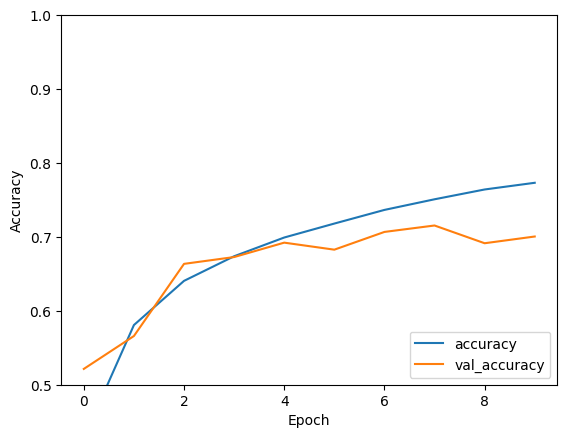

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## **Langkah 7 - Cetak Hasil Akurasi**

In [27]:
print(test_acc)

0.7005000114440918
